In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [43]:
data = pd.read_csv("Datasets/Scholarship.csv")

In [18]:
df = data.copy()

In [19]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [20]:
df.shape

(1000, 3)

/var/folders/jq/b4b2smnx3jg4svq7ygkgqwnr0000gn/T/ipykernel_1941/964597839.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["semester_percentage"])
/var/folders/jq/b4b2smnx3jg4svq7ygkgqwnr0000gn/T/ipykernel_1941/964597839.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_e

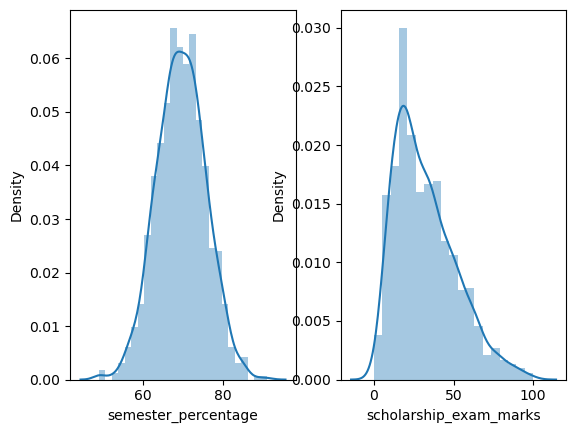

In [21]:
# check which column follows the normal distribution
plt.subplot(1,2,1)
sns.distplot(df["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(df["scholarship_exam_marks"])
plt.show()
             

In [26]:
# from the graph we can see that semester_percentage follows 
# normal distribution. so we will work with it using z-score 

mean = df["semester_percentage"].mean ()
std = df["semester_percentage"].std()



In [27]:
print(mean ,",", std)

69.6124 , 6.158978751323897


In [31]:
# to find out liers : we know that the values lower than -3mu sigma 
# and greater than +3mu sigma are outliers

Highest_allowed = mean + 3* std
Lowest_allowed = mean - 3* std

In [32]:
print(Highest_allowed , "," , Lowest_allowed )

88.08933625397168 , 51.13546374602831


In [38]:
# Finding Outliers in that range

df[(df["semester_percentage"]< Lowest_allowed) | (df["semester_percentage"]> Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


## Trimming 

In [40]:
# to remove outliers take all the data

df[(df["semester_percentage"]> Lowest_allowed) & (df["semester_percentage"]< Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


## Finding z-score

In [44]:
df["z_score"] = (df["semester_percentage"] - df["semester_percentage"].mean())/df["semester_percentage"].std()

In [45]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [47]:
df[(df["z_score"]< -3) | (df["z_score"]>3)] 

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [48]:
df[(df["z_score"]> -3) & (df["z_score"]<3)] 

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


#### in the above examples we are trimming that is we are removing those rows but what if we dont want to remove . we perfor
## Capping

In [50]:
## capping means turning the vlaues >upper_limit are replaced to the upperlimit
## and the values < lower_limit are replaced to tlowerlimit

## for capping we us the numpy librabry for which we have to fine the upperlimit and lowerlimit

upper_limit = mean + 3* std
lower_limit = mean - 3* std

In [51]:
df["semester_percentage"] = np.where(df["semester_percentage"]>upper_limit, upper_limit, 
                            np.where(df["semester_percentage"]<lower_limit, lower_limit, df["semester_percentage"]))

In [52]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


In [53]:
#to check if capping  - no outliers found

df[(df["semester_percentage"]< Lowest_allowed) | (df["semester_percentage"]> Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
